In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Các bước tiền xử lý dữ liệu từ 5 bộ data thu thập từ [IMF](https://climatedata.imf.org/pages/climatechange-data ) (*Annual Surface Temperature Change*, *Atmospheric CO₂ Concentrations*, *Change in Mean Sea Levels*, *Climate-related Disasters Frequency*, *Forest and Carbon*):
* Lọc dữ liệu các quốc gia Châu Á, thống nhất tên nước.
* Kiểm tra tính đầy đủ của các chỉ số trong từng bộ.
* Lọc lại các dữ liệu cần thiết cho quá trình phân tích về sau.
* Kiểm tra và lọc dữ liệu theo năm.
* Gộp lại thành 1 bộ dữ liệu duy nhất cho mô hình.

## 51 quốc gia châu Á

In [124]:
# Đọc bộ dữ liệu các nước châu Á
asian = pd.read_csv('../data/raw_data/asian_countries.csv')
asian

Country ISO3
0            Afghanistan  AFG
1                Armenia  ARM
2             Azerbaijan  AZE
3                Bahrain  BHR
4             Bangladesh  BGD
5                 Bhutan  BTN
6      Brunei Darussalam  BRN
7               Cambodia  KHM
8                  China  CHN
9                 Cyprus  CYP
10               Georgia  GEO
11             Hong Kong  HKG
12                 India  IND
13             Indonesia  IDN
14                  Iran  IRN
15                  Iraq  IRQ
16                Israel  ISR
17                 Japan  JPN
18                Jordan  JOR
19            Kazakhstan  KAZ
20           North Korea  PRK
21           South Korea  KOR
22                Kuwait  KWT
23            Kyrgyzstan  KGZ
24                  Laos  LAO
25               Lebanon  LBN
26                 Macao  MAC
27              Malaysia  MYS
28              Maldives  MDV
29              Mongolia  MNG
30               Myanmar  MMR
31                 Nepal  NPL
32                  Oman  OMN
33              Pakistan  PAK
34    State of Palestine  PSE
35           Philippines  PHL
36                 Qatar  QAT
37          Saudi Arabia  SAU
38             Singapore  SGP
39             Sri Lanka  LKA
40  Syrian Arab Republic  SYR
41                Taiwan  TWN
42            Tajikistan  TJK
43              Thailand  THA
44           Timor-Leste  TLS
45               Türkiye  TUR
46          Turkmenistan  TKM
47  United Arab Emirates  ARE
48            Uzbekistan  UZB
49              Viet Nam  VNM
50                 Yemen  YEM
51                 World  WLD

In [125]:
# Đọc các bộ dữ liệu ClimateChange
ast = pd.read_csv('../data/raw_data/annual_surface_temperature_change.csv') #Annual Surface Temperature Change
fac = pd.read_csv('../data/raw_data/forest_and_carbon.csv') #Forest and Carbon
cdf = pd.read_csv('../data/raw_data/physical_risks_climate_related_disasters_frequency.csv') #Physical Risks: Climate-Related Disasters Frequency
msl = pd.read_csv('../data/raw_data/change_in_mean_sea_levels.csv') #Change in Mean Sea Levels
co2 = pd.read_csv('../data/raw_data/atmospheri_ CO₂_concentrations.csv') #Atmospheric CO₂ Concentrations

## Annual Surface Temperature Change

In [126]:
asian_ast = pd.merge(ast, asian, on='ISO3')
asian_ast.columns

Index(['ObjectId', 'Country_x', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS Code', 'CTS Name', 'CTS Full Descriptor', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023', 'Country_y'],
      dtype='object')

In [127]:
# Giữ lại các thuộc tính có giá trị phân tích
asian_ast['Country_x'] = asian_ast['Country_y']
asian_ast = asian_ast.rename(columns={"Country_x": "Country"})
asian_ast = asian_ast.drop(['ObjectId', 'Country_y', 'ISO2', 'Source',
       'CTS Code', 'CTS Name', 'CTS Full Descriptor'], axis=1, errors='ignore')

In [128]:
def visualize_missing_values(df):
    year_columns = [col for col in df.columns if col.isdigit()]
    missing_values = df[year_columns].isnull().sum()
    
    # Plot the missing values
    plt.figure(figsize=(14,8))
    plt.bar(missing_values.index, missing_values.values, color='skyblue')
    plt.xlabel('Year')
    plt.ylabel('Number of Missing Values')
    plt.title('Missing Values Over the Years')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


def visualize_missing_by_country(df):
    year_columns = [col for col in df.columns if col.isdigit()]
    country_year_data = df[['Country'] + year_columns]
    missing_data = country_year_data.set_index('Country').isnull().astype(int)
    
    # Plot the heatmap
    plt.figure(figsize=(16, 10))
    sns.heatmap(missing_data, cmap='YlGnBu', cbar_kws={'label': 'Missing Values (1 = Missing, 0 = Present)'})
    plt.title('Missing Values by Country Over Years')
    plt.xlabel('Year')
    plt.ylabel('Country')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

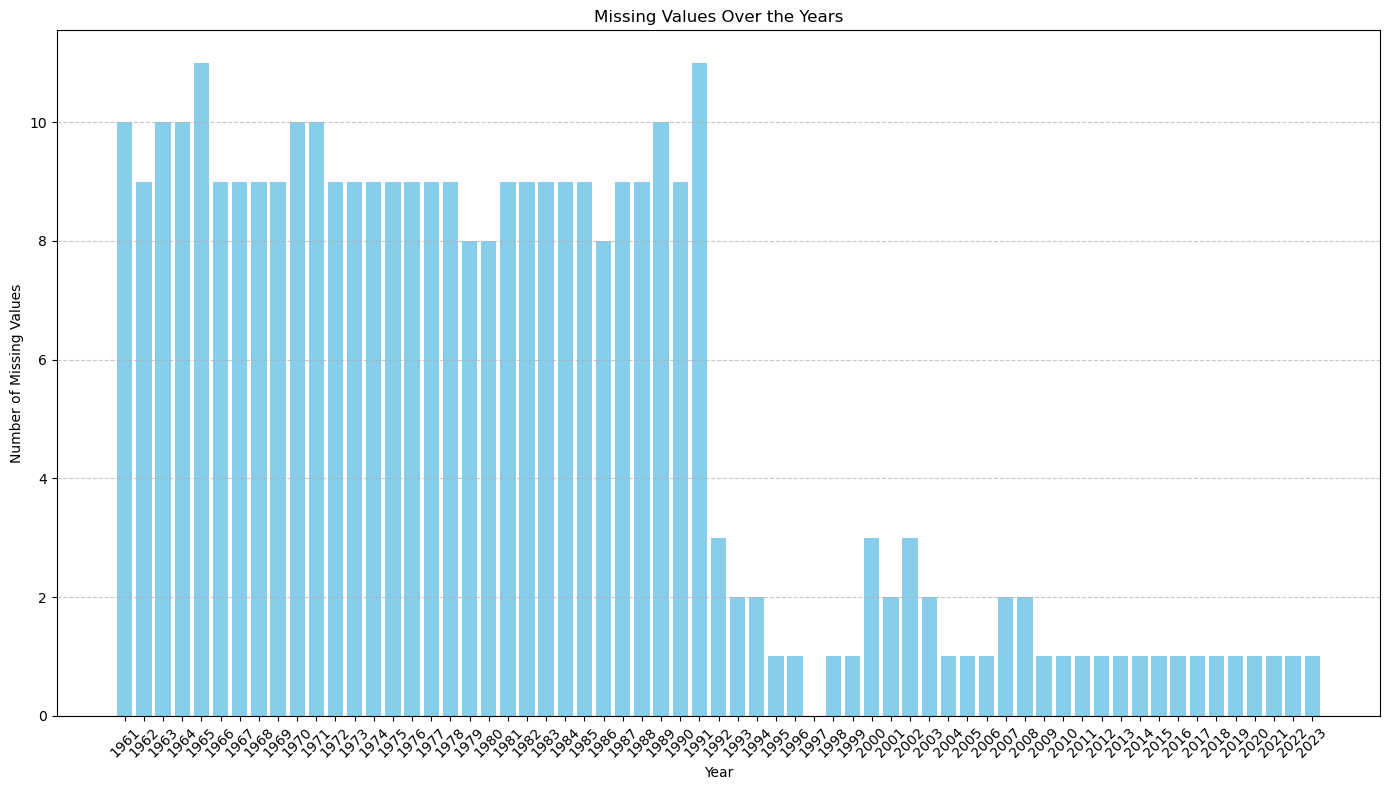

In [129]:
visualize_missing_values(asian_ast)

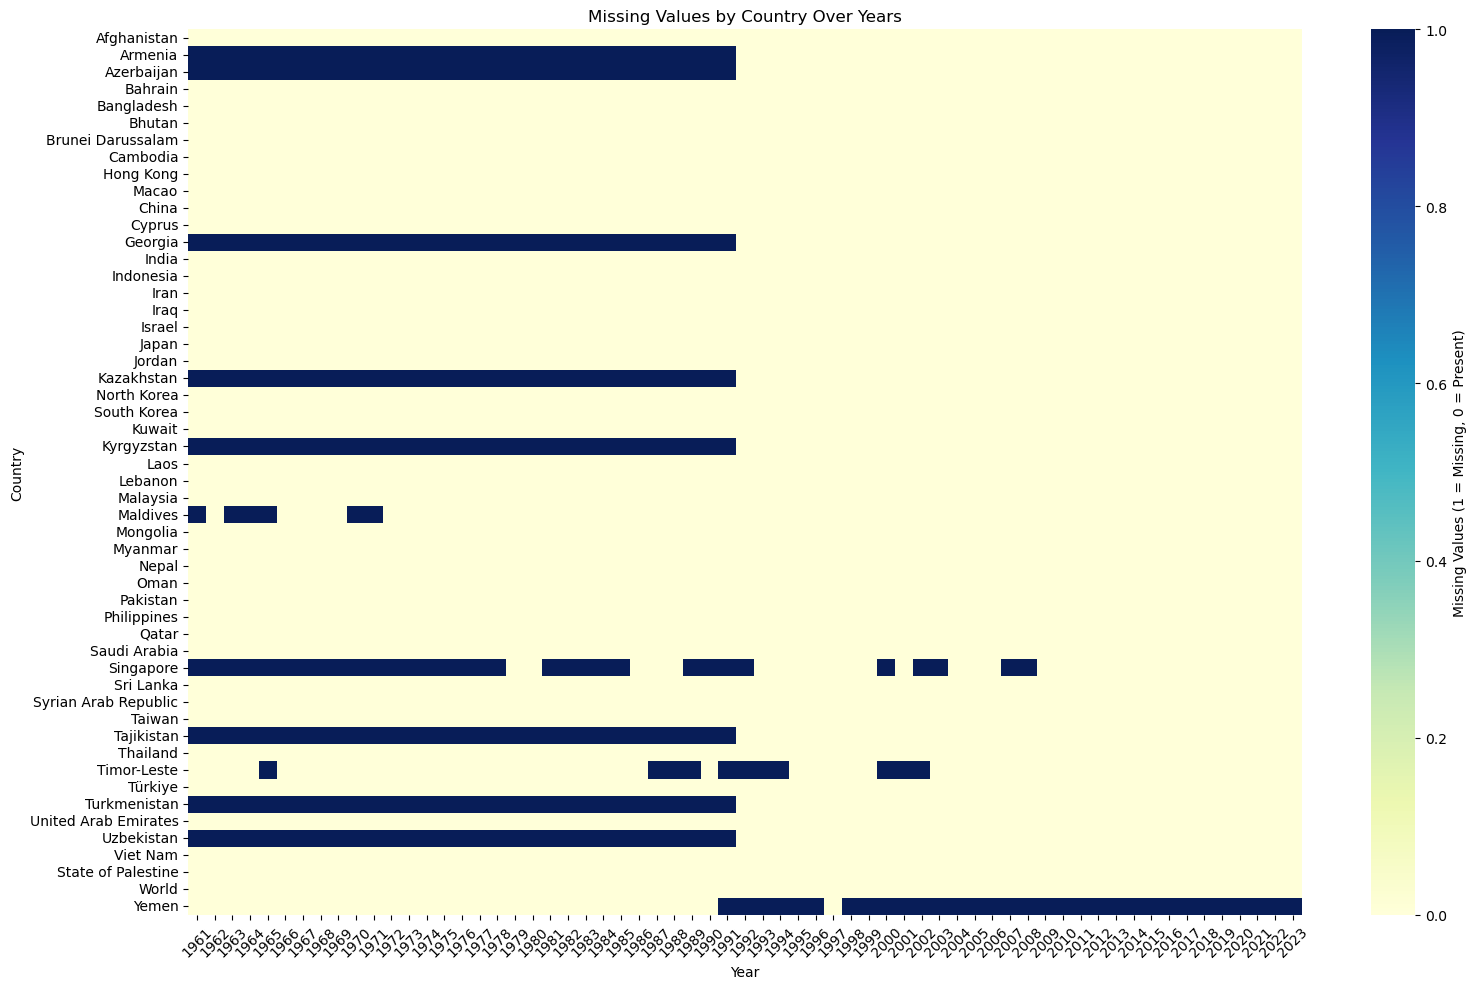

In [130]:
# Missing Values (1 = Missing, 0 = Present
visualize_missing_by_country(asian_ast)

Đối với bộ dữ liệu Annual Surface Temperature Change, dễ thấy số liệu bắt đầu ổn định từ năm 2016, tuy nhiên Yemen là quốc gia duy nhất có số liệu không ổn định trong khoảng thời gian này.

## Atmospheric CO₂ Concentrations

In [131]:
co2.head()

ObjectId Country  ISO2 ISO3  \
0         1   World   NaN  WLD   
1         2   World   NaN  WLD   
2         3   World   NaN  WLD   
3         4   World   NaN  WLD   
4         5   World   NaN  WLD   

                                           Indicator               Unit  \
0  Monthly Atmospheric Carbon Dioxide Concentrations  Parts Per Million   
1  Monthly Atmospheric Carbon Dioxide Concentrations  Parts Per Million   
2  Monthly Atmospheric Carbon Dioxide Concentrations  Parts Per Million   
3  Monthly Atmospheric Carbon Dioxide Concentrations  Parts Per Million   
4  Monthly Atmospheric Carbon Dioxide Concentrations  Parts Per Million   

                                              Source CTS Code  \
0  Dr. Pieter Tans, National Oceanic and Atmosphe...     ECCA   
1  Dr. Pieter Tans, National Oceanic and Atmosphe...     ECCA   
2  Dr. Pieter Tans, National Oceanic and Atmosphe...     ECCA   
3  Dr. Pieter Tans, National Oceanic and Atmosphe...     ECCA   
4  Dr. Pieter Tans, National Oceanic and Atmosphe...     ECCA   

                                    CTS Name  \
0  Atmospheric Carbon Dioxide Concentrations   
1  Atmospheric Carbon Dioxide Concentrations   
2  Atmospheric Carbon Dioxide Concentrations   
3  Atmospheric Carbon Dioxide Concentrations   
4  Atmospheric Carbon Dioxide Concentrations   

                                 CTS Full Descriptor     Date   Value  
0  Environment, Climate Change, Climate and Weath...  1958M03  315.71  
1  Environment, Climate Change, Climate and Weath...  1958M04  317.45  
2  Environment, Climate Change, Climate and Weath...  1958M05  317.51  
3  Environment, Climate Change, Climate and Weath...  1958M06  317.27  
4  Environment, Climate Change, Climate and Weath...  1958M07  315.87

In [132]:
co2['Unit'].unique()

array(['Parts Per Million', 'Percent'], dtype=object)

In [133]:
monthly_CO2_df_temp = co2[co2['Indicator'] == 'Monthly Atmospheric Carbon Dioxide Concentrations'].copy()
print(monthly_CO2_df_temp['Indicator'].unique())
print(monthly_CO2_df_temp['Unit'].unique())
monthly_CO2_df_temp.head()

['Monthly Atmospheric Carbon Dioxide Concentrations']
['Parts Per Million']


ObjectId Country  ISO2 ISO3  \
0         1   World   NaN  WLD   
1         2   World   NaN  WLD   
2         3   World   NaN  WLD   
3         4   World   NaN  WLD   
4         5   World   NaN  WLD   

                                           Indicator               Unit  \
0  Monthly Atmospheric Carbon Dioxide Concentrations  Parts Per Million   
1  Monthly Atmospheric Carbon Dioxide Concentrations  Parts Per Million   
2  Monthly Atmospheric Carbon Dioxide Concentrations  Parts Per Million   
3  Monthly Atmospheric Carbon Dioxide Concentrations  Parts Per Million   
4  Monthly Atmospheric Carbon Dioxide Concentrations  Parts Per Million   

                                              Source CTS Code  \
0  Dr. Pieter Tans, National Oceanic and Atmosphe...     ECCA   
1  Dr. Pieter Tans, National Oceanic and Atmosphe...     ECCA   
2  Dr. Pieter Tans, National Oceanic and Atmosphe...     ECCA   
3  Dr. Pieter Tans, National Oceanic and Atmosphe...     ECCA   
4  Dr. Pieter Tans, National Oceanic and Atmosphe...     ECCA   

                                    CTS Name  \
0  Atmospheric Carbon Dioxide Concentrations   
1  Atmospheric Carbon Dioxide Concentrations   
2  Atmospheric Carbon Dioxide Concentrations   
3  Atmospheric Carbon Dioxide Concentrations   
4  Atmospheric Carbon Dioxide Concentrations   

                                 CTS Full Descriptor     Date   Value  
0  Environment, Climate Change, Climate and Weath...  1958M03  315.71  
1  Environment, Climate Change, Climate and Weath...  1958M04  317.45  
2  Environment, Climate Change, Climate and Weath...  1958M05  317.51  
3  Environment, Climate Change, Climate and Weath...  1958M06  317.27  
4  Environment, Climate Change, Climate and Weath...  1958M07  315.87

In [134]:
monthly_CO2_df_temp['Date'] = monthly_CO2_df_temp['Date'].astype(str)
# Xóa ký tự 'D' trong cột 'Date' và chuyển đổi sang định dạng datetime
monthly_CO2_df_temp['Date'] = monthly_CO2_df_temp['Date'].str.replace('M', '/', regex=False)
monthly_CO2_df_temp['Date'] = pd.to_datetime(monthly_CO2_df_temp['Date'], format='%Y/%m', errors='coerce')
monthly_CO2_df_temp['Year'] = monthly_CO2_df_temp['Date'].dt.year

# Pivot dữ liệu để chuyển các giá trị 'Year' thành cột và lấy giá trị trung bình theo 'Measure' và 'Year'
monthly_CO2_df_pivoted = monthly_CO2_df_temp.pivot_table(index=['Country'], columns='Year', values='Value', aggfunc='mean')
monthly_CO2_df_pivoted = monthly_CO2_df_pivoted.reset_index()

# Lấy các cột bổ sung từ dữ liệu gốc và thêm vào dữ liệu đã pivot
additional_columns = monthly_CO2_df_temp[['Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source']].drop_duplicates()
monthly_CO2_df_complete = pd.merge(additional_columns, monthly_CO2_df_pivoted, on='Country', how='right')

# Đổi cột 'Indicator' thành một giá trị duy nhất và xóa các hàng trùng lặp
monthly_CO2_df_complete['Indicator'] = 'Monthly Atmospheric Carbon Dioxide Concentrations'
monthly_CO2_df_unique = monthly_CO2_df_complete.drop_duplicates(subset=['Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source'])

monthly_CO2_df_unique.head()

Country  ISO2 ISO3                                          Indicator  \
0   World   NaN  WLD  Monthly Atmospheric Carbon Dioxide Concentrations   

                Unit                                             Source  \
0  Parts Per Million  Dr. Pieter Tans, National Oceanic and Atmosphe...   

      1958        1959        1960        1961  ...      2015      2016  \
0  315.237  315.981667  316.908333  317.643333  ...  401.0125  404.4125   

         2017     2018        2019        2020        2021        2022  \
0  406.758333  408.715  411.649167  414.214167  416.414167  418.528333   

         2023        2024  
0  421.075833  425.522857  

[1 rows x 73 columns]

In [135]:
monthly_CO2_df_temp2 = co2[co2['Indicator'] == 'Monthly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change'].copy()
print(monthly_CO2_df_temp2['Indicator'].unique())
print(monthly_CO2_df_temp2['Unit'].unique())
monthly_CO2_df_temp2.head()

['Monthly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change']
['Percent']


ObjectId Country  ISO2 ISO3  \
13        14   World   NaN  WLD   
15        16   World   NaN  WLD   
17        18   World   NaN  WLD   
19        20   World   NaN  WLD   
21        22   World   NaN  WLD   

                                            Indicator     Unit  \
13  Monthly Atmospheric Carbon Dioxide Concentrati...  Percent   
15  Monthly Atmospheric Carbon Dioxide Concentrati...  Percent   
17  Monthly Atmospheric Carbon Dioxide Concentrati...  Percent   
19  Monthly Atmospheric Carbon Dioxide Concentrati...  Percent   
21  Monthly Atmospheric Carbon Dioxide Concentrati...  Percent   

                                               Source CTS Code  \
13  Dr. Pieter Tans, National Oceanic and Atmosphe...     ECCA   
15  Dr. Pieter Tans, National Oceanic and Atmosphe...     ECCA   
17  Dr. Pieter Tans, National Oceanic and Atmosphe...     ECCA   
19  Dr. Pieter Tans, National Oceanic and Atmosphe...     ECCA   
21  Dr. Pieter Tans, National Oceanic and Atmosphe...     ECCA   

                                     CTS Name  \
13  Atmospheric Carbon Dioxide Concentrations   
15  Atmospheric Carbon Dioxide Concentrations   
17  Atmospheric Carbon Dioxide Concentrations   
19  Atmospheric Carbon Dioxide Concentrations   
21  Atmospheric Carbon Dioxide Concentrations   

                                  CTS Full Descriptor     Date  Value  
13  Environment, Climate Change, Climate and Weath...  1959M03   0.30  
15  Environment, Climate Change, Climate and Weath...  1959M04   0.09  
17  Environment, Climate Change, Climate and Weath...  1959M05   0.25  
19  Environment, Climate Change, Climate and Weath...  1959M06   0.28  
21  Environment, Climate Change, Climate and Weath...  1959M07   0.21

In [136]:
monthly_CO2_df_temp2['Date'] = monthly_CO2_df_temp2['Date'].astype(str)
# Xóa ký tự 'D' trong cột 'Date' và chuyển đổi sang định dạng datetime
monthly_CO2_df_temp2['Date'] = monthly_CO2_df_temp2['Date'].str.replace('M', '/', regex=False)
monthly_CO2_df_temp2['Date'] = pd.to_datetime(monthly_CO2_df_temp2['Date'], format='%Y/%m', errors='coerce')
monthly_CO2_df_temp2['Year'] = monthly_CO2_df_temp2['Date'].dt.year

# Pivot dữ liệu để chuyển các giá trị 'Year' thành cột và lấy giá trị trung bình theo 'Measure' và 'Year'
monthly_CO2_df_pivoted2 = monthly_CO2_df_temp2.pivot_table(index=['Country'], columns='Year', values='Value', aggfunc='mean')
monthly_CO2_df_pivoted2 = monthly_CO2_df_pivoted2.reset_index()

# Lấy các cột bổ sung từ dữ liệu gốc và thêm vào dữ liệu đã pivot
additional_columns = monthly_CO2_df_temp2[['Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source']].drop_duplicates()
monthly_CO2_df_complete2 = pd.merge(additional_columns, monthly_CO2_df_pivoted2, on='Country', how='right')

# Đổi cột 'Indicator' thành một giá trị duy nhất và xóa các hàng trùng lặp
monthly_CO2_df_complete2['Indicator'] = 'Monthly Atmospheric Carbon Dioxide Concentrations, Year on Year Percentage Change'
monthly_CO2_df_unique2 = monthly_CO2_df_complete2.drop_duplicates(subset=['Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source'])

monthly_CO2_df_unique2.head()

Country  ISO2 ISO3                                          Indicator  \
0   World   NaN  WLD  Monthly Atmospheric Carbon Dioxide Concentrati...   

      Unit                                             Source   1959    1960  \
0  Percent  Dr. Pieter Tans, National Oceanic and Atmosphe...  0.234  0.2925   

     1961      1962  ...    2015      2016  2017    2018    2019      2020  \
0  0.2325  0.255833  ...  0.5525  0.848333  0.58  0.4825  0.7175  0.623333   

       2021      2022      2023      2024  
0  0.530833  0.508333  0.608333  0.847143  

[1 rows x 72 columns]

In [137]:
aCO2c = pd.concat([monthly_CO2_df_unique, monthly_CO2_df_unique2], ignore_index=True)

In [138]:
aCO2c.head()

Country  ISO2 ISO3                                          Indicator  \
0   World   NaN  WLD  Monthly Atmospheric Carbon Dioxide Concentrations   
1   World   NaN  WLD  Monthly Atmospheric Carbon Dioxide Concentrati...   

                Unit                                             Source  \
0  Parts Per Million  Dr. Pieter Tans, National Oceanic and Atmosphe...   
1            Percent  Dr. Pieter Tans, National Oceanic and Atmosphe...   

      1958        1959        1960        1961  ...      2015        2016  \
0  315.237  315.981667  316.908333  317.643333  ...  401.0125  404.412500   
1      NaN    0.234000    0.292500    0.232500  ...    0.5525    0.848333   

         2017      2018        2019        2020        2021        2022  \
0  406.758333  408.7150  411.649167  414.214167  416.414167  418.528333   
1    0.580000    0.4825    0.717500    0.623333    0.530833    0.508333   

         2023        2024  
0  421.075833  425.522857  
1    0.608333    0.847143  

[2 rows x 73 columns]

In [139]:
co2_world = aCO2c.drop(['ISO2',  'Source'], axis=1, errors='ignore')
co2_world


Country ISO3                                          Indicator  \
0   World  WLD  Monthly Atmospheric Carbon Dioxide Concentrations   
1   World  WLD  Monthly Atmospheric Carbon Dioxide Concentrati...   

                Unit     1958        1959        1960        1961        1962  \
0  Parts Per Million  315.237  315.981667  316.908333  317.643333  318.453333   
1            Percent      NaN    0.234000    0.292500    0.232500    0.255833   

         1963  ...      2015        2016        2017      2018        2019  \
0  318.992500  ...  401.0125  404.412500  406.758333  408.7150  411.649167   
1    0.168333  ...    0.5525    0.848333    0.580000    0.4825    0.717500   

         2020        2021        2022        2023        2024  
0  414.214167  416.414167  418.528333  421.075833  425.522857  
1    0.623333    0.530833    0.508333    0.608333    0.847143  

[2 rows x 71 columns]

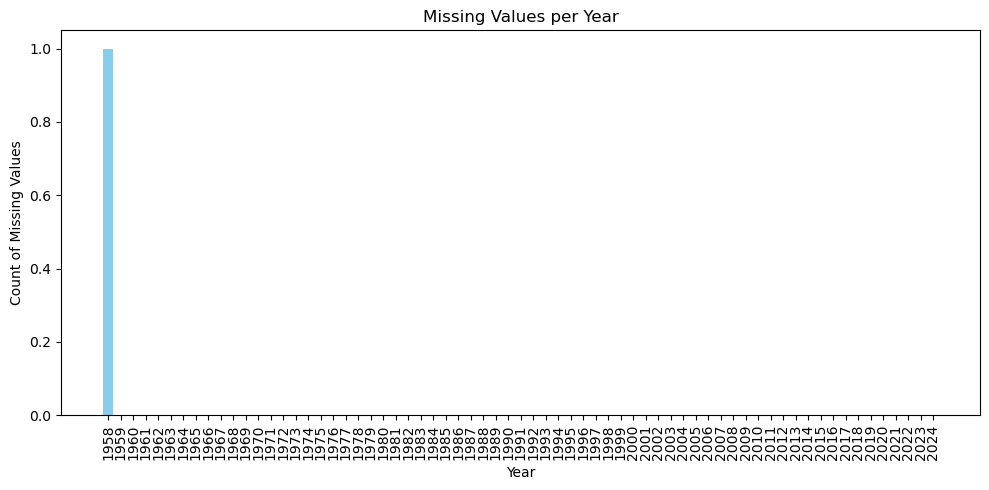

In [140]:
year_columns = [col for col in co2_world.columns if str(col).isdigit()]
missing_values = co2_world[year_columns].isnull().sum()

# Plot the missing values
plt.figure(figsize=(10, 5))
plt.bar(missing_values.index.astype(str), missing_values.values, color='skyblue')
plt.title("Missing Values per Year")
plt.xlabel("Year")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Không có giá trị khuyết nào đối với chỉ số này

## Change in Mean Sea Levels

In [141]:
msl.head()

ObjectId Country  ISO2 ISO3  \
0         1   World   NaN  WLD   
1         2   World   NaN  WLD   
2         3   World   NaN  WLD   
3         4   World   NaN  WLD   
4         5   World   NaN  WLD   

                                           Indicator         Unit  \
0  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   
1  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   
2  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   
3  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   
4  Change in mean sea level: Sea level: TOPEX.Pos...  Millimeters   

                                              Source CTS Code  \
0  National Oceanic and Atmospheric Administratio...     ECCL   
1  National Oceanic and Atmospheric Administratio...     ECCL   
2  National Oceanic and Atmospheric Administratio...     ECCL   
3  National Oceanic and Atmospheric Administratio...     ECCL   
4  National Oceanic and Atmospheric Administratio...     ECCL   

                   CTS Name  \
0  Change in Mean Sea Level   
1  Change in Mean Sea Level   
2  Change in Mean Sea Level   
3  Change in Mean Sea Level   
4  Change in Mean Sea Level   

                                 CTS Full Descriptor         Measure  \
0  Environment, Climate Change, Climate and Weath...     Sea Okhotsk   
1  Environment, Climate Change, Climate and Weath...    Adriatic Sea   
2  Environment, Climate Change, Climate and Weath...     Andaman Sea   
3  Environment, Climate Change, Climate and Weath...     Arabian Sea   
4  Environment, Climate Change, Climate and Weath...  Atlantic Ocean   

          Date  Value  
0  D12/16/1992  10.11  
1  D12/17/1992  32.73  
2  D12/17/1992 -14.88  
3  D12/17/1992  -9.76  
4  D12/17/1992 -13.66

In [142]:
msl['Date'] = msl['Date'].astype(str)
# Xóa ký tự 'D' trong cột 'Date' và chuyển đổi sang định dạng datetime
msl['Date'] = msl['Date'].str.replace('D', '', regex=False)
msl['Date'] = pd.to_datetime(msl['Date'], format='%m/%d/%Y', errors='coerce')
msl['Year'] = msl['Date'].dt.year

# Pivot dữ liệu để chuyển các giá trị 'Year' thành cột và lấy giá trị trung bình theo 'Measure' và 'Year'
data_pivoted = msl.pivot_table(index=['Measure'], columns='Year', values='Value', aggfunc='mean')
data_pivoted = data_pivoted.reset_index()

# Lấy các cột bổ sung từ dữ liệu gốc và thêm vào dữ liệu đã pivot
additional_columns = msl[['Measure', 'Country', 'ISO3', 'Indicator', 'Unit', 'Source']].drop_duplicates()
data_complete = pd.merge(additional_columns, data_pivoted, on='Measure', how='right')

# Đổi cột 'Indicator' thành một giá trị duy nhất và xóa các hàng trùng lặp
data_complete['Indicator'] = 'Change in mean sea level: Sea level'
data_unique = data_complete.drop_duplicates(subset=['Measure', 'Country', 'ISO3', 'Indicator', 'Unit', 'Source'])

data_unique.head()

Measure Country ISO3                            Indicator  \
0     Adriatic Sea   World  WLD  Change in mean sea level: Sea level   
6      Andaman Sea   World  WLD  Change in mean sea level: Sea level   
12     Arabian Sea   World  WLD  Change in mean sea level: Sea level   
18  Atlantic Ocean   World  WLD  Change in mean sea level: Sea level   
24      Baltic Sea   World  WLD  Change in mean sea level: Sea level   

           Unit                                             Source    1992  \
0   Millimeters  National Oceanic and Atmospheric Administratio...   -4.32   
6   Millimeters  National Oceanic and Atmospheric Administratio...  -12.13   
12  Millimeters  National Oceanic and Atmospheric Administratio...    3.09   
18  Millimeters  National Oceanic and Atmospheric Administratio...  -12.31   
24  Millimeters  National Oceanic and Atmospheric Administratio...  216.55   

         1993       1994       1995  ...        2015        2016        2017  \
0  -43.352353 -14.461176 -18.405484  ...   41.870541   40.263000    5.071800   
6  -11.821176 -45.074118   1.073125  ...   46.638378  118.080429   48.602549   
12  -1.883529  -1.110000   3.727500  ...   76.339189   76.094143   66.067843   
18 -18.151176 -14.660000  -7.892258  ...   45.719189   49.254000   54.032353   
24 -36.814706 -12.332353  25.759375  ...  143.338378   56.301714  119.694902   

         2018       2019        2020        2021        2022        2023  \
0   67.494595  48.928571   49.055676   43.623243   40.335890   67.538571   
6   59.548378   9.718649   86.420556  128.116486  120.405676   32.191429   
12  46.890811  81.558378   94.704865   92.790000   74.707568   88.901429   
18  60.154865  68.727838   67.125946   73.136081   73.060405   80.109286   
24  34.972973  80.689189  176.454865   71.869054  126.682329  122.545000   

          2024  
0    77.761429  
6    20.615714  
12   79.972857  
18   75.495714  
24  191.640000  

[5 rows x 39 columns]

In [143]:
mean_sea_level = data_unique.drop(['Source'], axis=1, errors='ignore')
mean_sea_level

Measure Country ISO3                            Indicator  \
0      Adriatic Sea   World  WLD  Change in mean sea level: Sea level   
6       Andaman Sea   World  WLD  Change in mean sea level: Sea level   
12      Arabian Sea   World  WLD  Change in mean sea level: Sea level   
18   Atlantic Ocean   World  WLD  Change in mean sea level: Sea level   
24       Baltic Sea   World  WLD  Change in mean sea level: Sea level   
30       Bay Bengal   World  WLD  Change in mean sea level: Sea level   
36       Bering Sea   World  WLD  Change in mean sea level: Sea level   
42    Caribbean Sea   World  WLD  Change in mean sea level: Sea level   
48      Gulf Mexico   World  WLD  Change in mean sea level: Sea level   
54     Indian Ocean   World  WLD  Change in mean sea level: Sea level   
60       Indonesian   World  WLD  Change in mean sea level: Sea level   
66    Mediterranean   World  WLD  Change in mean sea level: Sea level   
72             Nino   World  WLD  Change in mean sea level: Sea level   
78   North Atlantic   World  WLD  Change in mean sea level: Sea level   
84    North Pacific   World  WLD  Change in mean sea level: Sea level   
90        North Sea   World  WLD  Change in mean sea level: Sea level   
96    Pacific Ocean   World  WLD  Change in mean sea level: Sea level   
102    Persian Gulf   World  WLD  Change in mean sea level: Sea level   
108       Sea Japan   World  WLD  Change in mean sea level: Sea level   
114     Sea Okhotsk   World  WLD  Change in mean sea level: Sea level   
120     South China   World  WLD  Change in mean sea level: Sea level   
126  Southern Ocean   World  WLD  Change in mean sea level: Sea level   
132         Tropics   World  WLD  Change in mean sea level: Sea level   
138           World   World  WLD  Change in mean sea level: Sea level   
144      Yellow Sea   World  WLD  Change in mean sea level: Sea level   

            Unit    1992       1993       1994       1995        1996  ...  \
0    Millimeters   -4.32 -43.352353 -14.461176 -18.405484    3.912353  ...   
6    Millimeters  -12.13 -11.821176 -45.074118   1.073125   13.407879  ...   
12   Millimeters    3.09  -1.883529  -1.110000   3.727500   -6.663030  ...   
18   Millimeters  -12.31 -18.151176 -14.660000  -7.892258   -6.821765  ...   
24   Millimeters  216.55 -36.814706 -12.332353  25.759375 -108.362121  ...   
30   Millimeters    0.78  -9.378824 -20.293529   1.808125    4.269394  ...   
36   Millimeters  -25.09  -8.007647  -9.834118  16.145484   35.701176  ...   
42   Millimeters   -3.73 -11.368235   6.240588  -2.842903  -17.177059  ...   
48   Millimeters   -7.37  -7.881765 -15.622941  -0.979375  -31.783636  ...   
54   Millimeters  -19.32 -19.002353 -16.178824 -10.155484   -9.734706  ...   
60   Millimeters  -14.98 -74.168235 -67.585882 -25.467500   23.382121  ...   
66   Millimeters   14.81 -30.260588 -13.210588 -10.177500   12.687273  ...   
72   Millimeters   -7.84 -14.948824 -10.942941  -9.925484   -3.804706  ...   
78   Millimeters   -0.89 -17.031176 -12.290000  -1.231935   -7.051765  ...   
84   Millimeters    0.46 -14.313529  -2.119412 -11.014194  -10.166471  ...   
90   Millimeters   47.79 -13.062941 -18.904118   2.899375  -34.896364  ...   
96   Millimeters  -22.20 -18.485294 -12.876471 -10.025806   -5.076471  ...   
102  Millimeters  103.73 -19.602353   1.106471  -1.301250    7.601212  ...   
108  Millimeters  -34.66 -30.854118  -4.630588 -16.894375  -23.390303  ...   
114  Millimeters  -13.64 -23.007647 -18.140000   5.975625   11.431212  ...   
120  Millimeters  -14.28 -40.768235 -35.685882 -23.738065  -12.074118  ...   
126  Millimeters  -19.49 -21.542941 -17.381176 -12.075484   -9.425294  ...   
132  Millimeters  -21.86 -19.289412 -15.689412  -9.168065   -4.180588  ...   
138  Millimeters  -17.02 -19.555294 -14.858235  -9.436129   -5.887647  ...   
144  Millimeters  -67.85 -33.091176  -6.850000 -30.006452  -17.167647  ...   

           2015        2016        2017       2018        2019        2020  \
0     

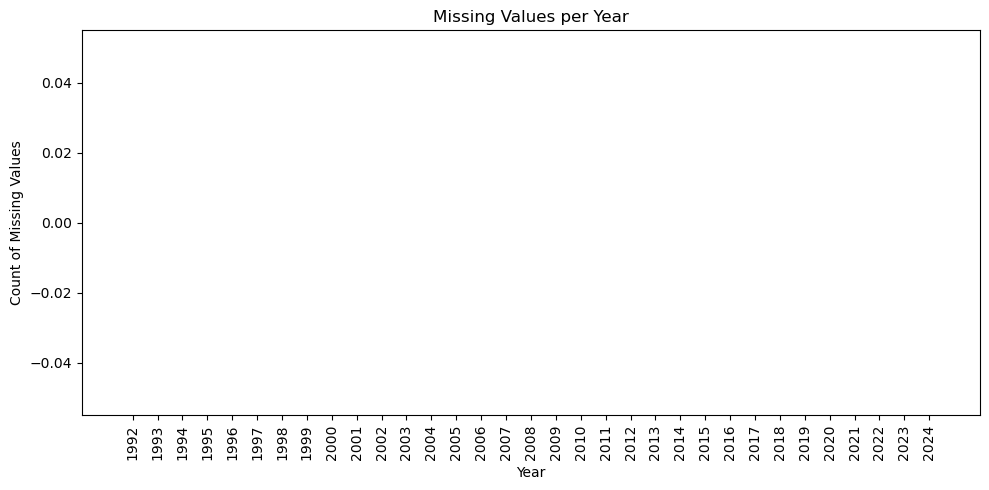

In [144]:
year_columns = [col for col in mean_sea_level.columns if str(col).isdigit()]
missing_values = mean_sea_level[year_columns].isnull().sum()

# Plot the missing values
plt.figure(figsize=(10, 5))
plt.bar(missing_values.index.astype(str), missing_values.values, color='skyblue')
plt.title("Missing Values per Year")
plt.xlabel("Year")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Không có giá trị khuyết trong bộ dữ liệu.

## Climate-related Disasters Frequency

In [145]:
asian_cdf = pd.merge(cdf, asian, on='ISO3')
asian_cdf.columns

Index(['ObjectId', 'Country_x', 'ISO2', 'ISO3', 'Indicator', 'Unit', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023', 'Source',
       'Country_y'],
      dtype='object')

In [146]:
# Giữ lại các thuộc tính có giá trị phân tích
asian_cdf['Country_x'] = asian_cdf['Country_y']
asian_cdf = asian_cdf.rename(columns={"Country_x": "Country"})
asian_cdf = asian_cdf.drop(['ObjectId', 'Country_y', 'ISO2', 'Source'], axis=1, errors='ignore')
asian_cdf

Country ISO3  \
0           Afghanistan  AFG   
1           Afghanistan  AFG   
2           Afghanistan  AFG   
3           Afghanistan  AFG   
4           Afghanistan  AFG   
..                  ...  ...   
240  State of Palestine  PSE   
241               Yemen  YEM   
242               Yemen  YEM   
243               Yemen  YEM   
244               Yemen  YEM   

                                             Indicator       Unit  1980  1981  \
0    Climate related disasters frequency, Number of...  Number of   NaN   NaN   
1    Climate related disasters frequency, Number of...  Number of   NaN   NaN   
2    Climate related disasters frequency, Number of...  Number of   1.0   NaN   
3    Climate related disasters frequency, Number of...  Number of   NaN   NaN   
4    Climate related disasters frequency, Number of...  Number of   NaN   NaN   
..                                                 ...        ...   ...   ...   
240  Climate related disasters frequency, Number of...  Number of   NaN   NaN   
241  Climate related disasters frequency, Number of...  Number of   NaN   NaN   
242  Climate related disasters frequency, Number of...  Number of   NaN   NaN   
243  Climate related disasters frequency, Number of...  Number of   NaN   NaN   
244  Climate related disasters frequency, Number of...  Number of   NaN   NaN   

     1982  1983  1984  1985  ...  2014  2015  2016  2017  2018  2019  2020  \
0     NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   1.0   NaN   NaN   
1     NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2     NaN   NaN   NaN   NaN  ...   2.0   1.0   4.0   1.0   3.0   6.0   5.0   
3     NaN   NaN   NaN   NaN  ...   NaN   4.0   NaN   2.0   1.0   1.0   1.0   
4     NaN   NaN   NaN   NaN  ...   1.0   NaN   NaN   2.0   NaN   NaN   1.0   
..    ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   
240   NaN   NaN   NaN   NaN  ...   NaN   2.0   NaN   NaN   NaN   NaN   1.0   
241   NaN   NaN   NaN   NaN  ...   NaN   NaN   1.0   1.0   NaN   3.0   5.0   
242   NaN   NaN   NaN   NaN  ...   NaN   NaN   1.0   NaN   NaN   NaN   NaN   
243   NaN   NaN   NaN   NaN  ...   NaN   2.0   NaN   NaN   2.0   NaN   NaN   
244   NaN   NaN   NaN   NaN  ...   NaN   2.0   2.0   1.0   2.0   3.0   5.0   

     2021  2022  2023  
0     1.0   NaN   NaN  
1     NaN   NaN   1.0  
2     2.0   5.0   2.0  
3     1.0   1.0   NaN  
4     NaN   NaN   NaN  
..    ...   ...   ...  
240   NaN   1.0   NaN  
241   2.0   3.0   1.0  
242   NaN   NaN   NaN  
243   NaN   NaN   1.0  
244   2.0   3.0   2.0  

[245 rows x 48 columns]

In [147]:
def check_missing_indicators(df):
    # Danh sách các giá trị unique trong cột 'Indicator'
    all_indicators = df['Indicator'].unique()
    
    # Group dữ liệu theo 'Country' và kiểm tra số lượng unique indicators cho mỗi quốc gia
    country_indicator_counts = df.groupby('Country')['Indicator'].nunique()
    
    # Tìm các quốc gia có số lượng indicator không bằng 
    countries_with_missing_indicators = country_indicator_counts[country_indicator_counts != 7]
    
    # Lấy ra các quốc gia và các indicator bị thiếu
    missing_indicators_info = {}
    
    for country in countries_with_missing_indicators.index:
        # Lấy ra các indicator có mặt cho từng quốc gia
        present_indicators = df[df['Country'] == country]['Indicator'].unique()
        
        # Tính toán các indicator bị thiếu
        missing_indicators = set(all_indicators) - set(present_indicators)
        
        # Lưu kết quả vào dictionary
        missing_indicators_info[country] = list(missing_indicators)
    
    return missing_indicators_info

In [148]:
asian_cdf['Indicator'].unique()

array(['Climate related disasters frequency, Number of Disasters: Drought',
       'Climate related disasters frequency, Number of Disasters: Extreme temperature',
       'Climate related disasters frequency, Number of Disasters: Flood',
       'Climate related disasters frequency, Number of Disasters: Landslide',
       'Climate related disasters frequency, Number of Disasters: Storm',
       'Climate related disasters frequency, Number of Disasters: TOTAL',
       'Climate related disasters frequency, Number of Disasters: Wildfire'],
      dtype=object)

Bộ dữ liệu Land and Carbon gồm 7 indicator thể hiện số lần xảy ra các thiên tai trong năm của từng quốc gia :
* Hạn hán
* Nhiệt độ cực đoan(sự gia tằng nhiệt độ mức tối đa)
* Lũ lụt
* Lở đất
* Bão
* TỔNG SỐ
* Cháy rừng

In [149]:
indicator_mapping = {
"Climate related disasters frequency, Number of Disasters: Drought": "Drought",
"Climate related disasters frequency, Number of Disasters: Extreme temperature": "Extreme temperature",
"Climate related disasters frequency, Number of Disasters: Flood": "Flood",
"Climate related disasters frequency, Number of Disasters: Landslide": "Landslide",
"Climate related disasters frequency, Number of Disasters: Storm": "Storm",
"Climate related disasters frequency, Number of Disasters: TOTAL": "TOTAL",
"Climate related disasters frequency, Number of Disasters: Wildfire": "Wildfire"
}

asian_cdf['Indicator'] = asian_cdf['Indicator'].replace(indicator_mapping)

In [150]:
asian_cdf.replace(np.nan, 0, inplace=True)
asian_cdf

Country ISO3            Indicator       Unit  1980  1981  \
0           Afghanistan  AFG              Drought  Number of   0.0   0.0   
1           Afghanistan  AFG  Extreme temperature  Number of   0.0   0.0   
2           Afghanistan  AFG                Flood  Number of   1.0   0.0   
3           Afghanistan  AFG            Landslide  Number of   0.0   0.0   
4           Afghanistan  AFG                Storm  Number of   0.0   0.0   
..                  ...  ...                  ...        ...   ...   ...   
240  State of Palestine  PSE                TOTAL  Number of   0.0   0.0   
241               Yemen  YEM                Flood  Number of   0.0   0.0   
242               Yemen  YEM            Landslide  Number of   0.0   0.0   
243               Yemen  YEM                Storm  Number of   0.0   0.0   
244               Yemen  YEM                TOTAL  Number of   0.0   0.0   

     1982  1983  1984  1985  ...  2014  2015  2016  2017  2018  2019  2020  \
0     0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
1     0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2     0.0   0.0   0.0   0.0  ...   2.0   1.0   4.0   1.0   3.0   6.0   5.0   
3     0.0   0.0   0.0   0.0  ...   0.0   4.0   0.0   2.0   1.0   1.0   1.0   
4     0.0   0.0   0.0   0.0  ...   1.0   0.0   0.0   2.0   0.0   0.0   1.0   
..    ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   
240   0.0   0.0   0.0   0.0  ...   0.0   2.0   0.0   0.0   0.0   0.0   1.0   
241   0.0   0.0   0.0   0.0  ...   0.0   0.0   1.0   1.0   0.0   3.0   5.0   
242   0.0   0.0   0.0   0.0  ...   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
243   0.0   0.0   0.0   0.0  ...   0.0   2.0   0.0   0.0   2.0   0.0   0.0   
244   0.0   0.0   0.0   0.0  ...   0.0   2.0   2.0   1.0   2.0   3.0   5.0   

     2021  2022  2023  
0     1.0   0.0   0.0  
1     0.0   0.0   1.0  
2     2.0   5.0   2.0  
3     1.0   1.0   0.0  
4     0.0   0.0   0.0  
..    ...   ...   ...  
240   0.0   1.0   0.0  
241   2.0   3.0   1.0  
242   0.0   0.0   0.0  
243   0.0   0.0   1.0  
244   2.0   3.0   2.0  

[245 rows x 48 columns]

In [151]:
def add_missing_disasters(df):
    # Define the required disasters
    required_indicators = [
        "Drought",
        "Extreme temperature",
        "Flood",
        "Landslide",
        "Storm",
        "Wildfire",
        "TOTAL"
    ]

    # Get unique countries from the DataFrame
    countries = df["Country"].unique()

    # List to store the new rows
    rows_to_add = []

    for country in countries:
        # Get current data for the country
        country_data = df[df["Country"] == country]
        present_indicators = country_data["Indicator"].tolist()

        # Determine missing indicators for the country
        missing_indicators = set(required_indicators) - set(present_indicators)

        for indicator in missing_indicators:
            # Create a new row for the missing indicator
            new_row = {
                "Country": country,
                "ISO3": country_data.iloc[0]["ISO3"],
                "Indicator": indicator,
                "Unit": "Number of"  # Default unit
            }

            # Add year columns with a default value of 0.0
            for year in range(1980, 2024):  # Assuming years are from 1980 to 2023
                new_row[year] = 0.0

            rows_to_add.append(new_row)

    # Append the new rows to the DataFrame
    df = pd.concat([df, pd.DataFrame(rows_to_add)], ignore_index=True)

    return df

In [152]:
update = add_missing_disasters(asian_cdf)
check_missing_indicators(update)

{}

In [153]:
update

Country ISO3            Indicator       Unit  1980  1981  \
0           Afghanistan  AFG              Drought  Number of   0.0   0.0   
1           Afghanistan  AFG  Extreme temperature  Number of   0.0   0.0   
2           Afghanistan  AFG                Flood  Number of   1.0   0.0   
3           Afghanistan  AFG            Landslide  Number of   0.0   0.0   
4           Afghanistan  AFG                Storm  Number of   0.0   0.0   
..                  ...  ...                  ...        ...   ...   ...   
338  State of Palestine  PSE              Drought  Number of   NaN   NaN   
339  State of Palestine  PSE            Landslide  Number of   NaN   NaN   
340               Yemen  YEM             Wildfire  Number of   NaN   NaN   
341               Yemen  YEM              Drought  Number of   NaN   NaN   
342               Yemen  YEM  Extreme temperature  Number of   NaN   NaN   

     1982  1983  1984  1985  ...  2014  2015  2016  2017  2018  2019  2020  \
0     0.0   0.0   0.0   0.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1     0.0   0.0   0.0   0.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2     0.0   0.0   0.0   0.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3     0.0   0.0   0.0   0.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4     0.0   0.0   0.0   0.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
..    ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   
338   NaN   NaN   NaN   NaN  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
339   NaN   NaN   NaN   NaN  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
340   NaN   NaN   NaN   NaN  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
341   NaN   NaN   NaN   NaN  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
342   NaN   NaN   NaN   NaN  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

     2021  2022  2023  
0     NaN   NaN   NaN  
1     NaN   NaN   NaN  
2     NaN   NaN   NaN  
3     NaN   NaN   NaN  
4     NaN   NaN   NaN  
..    ...   ...   ...  
338   0.0   0.0   0.0  
339   0.0   0.0   0.0  
340   0.0   0.0   0.0  
341   0.0   0.0   0.0  
342   0.0   0.0   0.0  

[343 rows x 92 columns]

In [154]:
check_missing_indicators(asian_cdf)

{'Armenia': ['Wildfire'],
 'Azerbaijan': ['Wildfire', 'Storm'],
 'Bangladesh': ['Wildfire'],
 'Bhutan': ['Drought', 'Extreme temperature', 'Landslide'],
 'Brunei Darussalam': ['Landslide',
  'Flood',
  'Storm',
  'Extreme temperature',
  'Drought'],
 'Cambodia': ['Wildfire', 'Extreme temperature', 'Landslide'],
 'Cyprus': ['Flood', 'Landslide'],
 'Georgia': ['Wildfire', 'Extreme temperature', 'Landslide'],
 'Indonesia': ['Extreme temperature'],
 'Iran': ['Extreme temperature'],
 'Iraq': ['Wildfire', 'Extreme temperature', 'Landslide'],
 'Israel': ['Landslide'],
 'Japan': ['Drought'],
 'Jordan': ['Wildfire', 'Landslide'],
 'Kuwait': ['Landslide',
  'Wildfire',
  'Storm',
  'Extreme temperature',
  'Drought'],
 'Kyrgyzstan': ['Wildfire'],
 'Laos': ['Wildfire', 'Extreme temperature', 'Landslide'],
 'Lebanon': ['Drought', 'Landslide'],
 'Macao': ['Landslide', 'Flood', 'Wildfire', 'Extreme temperature', 'Drought'],
 'Malaysia': ['Extreme temperature'],
 'Maldives': ['Wildfire', 'Drought', '

In [155]:
def ensure_seven_indicators(df):
    required_indicators = [
        "Drought",
        "Extreme temperature",
        "Flood",
        "Landslide",
        "Storm",
        "Wildfire",
        "TOTAL",
    ]

    # Get a list of unique countries
    countries = df["Country"].unique()
    
    # List to hold rows to add
    rows_to_add = []

    for country in countries:
        country_data = df[df["Country"] == country]
        existing_indicators = country_data["Indicator"].tolist()

        # Find missing indicators for the country
        missing_indicators = set(required_indicators) - set(existing_indicators)

        for indicator in missing_indicators:
            row = {
                "Country": country,
                "ISO3": country_data.iloc[0]["ISO3"],
                "Indicator": indicator,
                "Unit": "Number of",  # Default unit
            }
            # Add year columns with default values (e.g., 0.0)
            for year in range(1980, 2024):
                row[year] = 0.0

            rows_to_add.append(row)

    # Append the new rows to the original DataFrame
    #df = pd.concat([df, pd.DataFrame(rows_to_add)], ignore_index=True)

    return df

In [156]:
temp = ensure_seven_indicators(asian_cdf)
temp
#check_missing_indicators(asian_cdf)

Country ISO3            Indicator       Unit  1980  1981  \
0           Afghanistan  AFG              Drought  Number of   0.0   0.0   
1           Afghanistan  AFG  Extreme temperature  Number of   0.0   0.0   
2           Afghanistan  AFG                Flood  Number of   1.0   0.0   
3           Afghanistan  AFG            Landslide  Number of   0.0   0.0   
4           Afghanistan  AFG                Storm  Number of   0.0   0.0   
..                  ...  ...                  ...        ...   ...   ...   
240  State of Palestine  PSE                TOTAL  Number of   0.0   0.0   
241               Yemen  YEM                Flood  Number of   0.0   0.0   
242               Yemen  YEM            Landslide  Number of   0.0   0.0   
243               Yemen  YEM                Storm  Number of   0.0   0.0   
244               Yemen  YEM                TOTAL  Number of   0.0   0.0   

     1982  1983  1984  1985  ...  2014  2015  2016  2017  2018  2019  2020  \
0     0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
1     0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2     0.0   0.0   0.0   0.0  ...   2.0   1.0   4.0   1.0   3.0   6.0   5.0   
3     0.0   0.0   0.0   0.0  ...   0.0   4.0   0.0   2.0   1.0   1.0   1.0   
4     0.0   0.0   0.0   0.0  ...   1.0   0.0   0.0   2.0   0.0   0.0   1.0   
..    ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   
240   0.0   0.0   0.0   0.0  ...   0.0   2.0   0.0   0.0   0.0   0.0   1.0   
241   0.0   0.0   0.0   0.0  ...   0.0   0.0   1.0   1.0   0.0   3.0   5.0   
242   0.0   0.0   0.0   0.0  ...   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
243   0.0   0.0   0.0   0.0  ...   0.0   2.0   0.0   0.0   2.0   0.0   0.0   
244   0.0   0.0   0.0   0.0  ...   0.0   2.0   2.0   1.0   2.0   3.0   5.0   

     2021  2022  2023  
0     1.0   0.0   0.0  
1     0.0   0.0   1.0  
2     2.0   5.0   2.0  
3     1.0   1.0   0.0  
4     0.0   0.0   0.0  
..    ...   ...   ...  
240   0.0   1.0   0.0  
241   2.0   3.0   1.0  
242   0.0   0.0   0.0  
243   0.0   0.0   1.0  
244   2.0   3.0   2.0  

[245 rows x 48 columns]

In [157]:
asian_cdf

Country ISO3            Indicator       Unit  1980  1981  \
0           Afghanistan  AFG              Drought  Number of   0.0   0.0   
1           Afghanistan  AFG  Extreme temperature  Number of   0.0   0.0   
2           Afghanistan  AFG                Flood  Number of   1.0   0.0   
3           Afghanistan  AFG            Landslide  Number of   0.0   0.0   
4           Afghanistan  AFG                Storm  Number of   0.0   0.0   
..                  ...  ...                  ...        ...   ...   ...   
240  State of Palestine  PSE                TOTAL  Number of   0.0   0.0   
241               Yemen  YEM                Flood  Number of   0.0   0.0   
242               Yemen  YEM            Landslide  Number of   0.0   0.0   
243               Yemen  YEM                Storm  Number of   0.0   0.0   
244               Yemen  YEM                TOTAL  Number of   0.0   0.0   

     1982  1983  1984  1985  ...  2014  2015  2016  2017  2018  2019  2020  \
0     0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
1     0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2     0.0   0.0   0.0   0.0  ...   2.0   1.0   4.0   1.0   3.0   6.0   5.0   
3     0.0   0.0   0.0   0.0  ...   0.0   4.0   0.0   2.0   1.0   1.0   1.0   
4     0.0   0.0   0.0   0.0  ...   1.0   0.0   0.0   2.0   0.0   0.0   1.0   
..    ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   
240   0.0   0.0   0.0   0.0  ...   0.0   2.0   0.0   0.0   0.0   0.0   1.0   
241   0.0   0.0   0.0   0.0  ...   0.0   0.0   1.0   1.0   0.0   3.0   5.0   
242   0.0   0.0   0.0   0.0  ...   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
243   0.0   0.0   0.0   0.0  ...   0.0   2.0   0.0   0.0   2.0   0.0   0.0   
244   0.0   0.0   0.0   0.0  ...   0.0   2.0   2.0   1.0   2.0   3.0   5.0   

     2021  2022  2023  
0     1.0   0.0   0.0  
1     0.0   0.0   1.0  
2     2.0   5.0   2.0  
3     1.0   1.0   0.0  
4     0.0   0.0   0.0  
..    ...   ...   ...  
240   0.0   1.0   0.0  
241   2.0   3.0   1.0  
242   0.0   0.0   0.0  
243   0.0   0.0   1.0  
244   2.0   3.0   2.0  

[245 rows x 48 columns]

## Forest and Carbon

In [158]:
asian_fac = pd.merge(fac, asian, on='ISO3')
asian_fac.columns

Index(['ObjectId', 'Country_x', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'F1992', 'F1993',
       'F1994', 'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001',
       'F2002', 'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009',
       'F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017',
       'F2018', 'F2019', 'F2020', 'F2021', 'F2022', 'Country_y'],
      dtype='object')

In [159]:
# Giữ lại các thuộc tính có giá trị phân tích
asian_fac['Country_x'] = asian_fac['Country_y']
asian_fac = asian_fac.rename(columns={"Country_x": "Country"})
asian_fac = asian_fac.drop(['ObjectId', 'Country_y', 'ISO2', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor'], axis=1, errors='ignore')
asian_fac

Country ISO3                          Indicator            Unit  \
0    Afghanistan  AFG                        Forest area         1000 HA   
1    Afghanistan  AFG             Index of forest extent           Index   
2    Afghanistan  AFG                          Land area         1000 HA   
3    Afghanistan  AFG               Share of forest area         Percent   
4        Armenia  ARM           Carbon stocks in forests  Million tonnes   
..           ...  ...                                ...             ...   
273        Yemen  YEM                        Forest area         1000 HA   
274        Yemen  YEM  Index of carbon stocks in forests           Index   
275        Yemen  YEM             Index of forest extent           Index   
276        Yemen  YEM                          Land area         1000 HA   
277        Yemen  YEM               Share of forest area         Percent   

            F1992         F1993         F1994         F1995         F1996  \
0     1208.440000   1208.440000   1208.440000   1208.440000   1208.440000   
1      100.000000    100.000000    100.000000    100.000000    100.000000   
2    65223.000000  65223.000000  65223.000000  65223.000000  65223.000000   
3        1.852782      1.852782      1.852782      1.852782      1.852782   
4       15.948900     15.913300     15.877700     15.842100     15.806500   
..            ...           ...           ...           ...           ...   
273    549.000000    549.000000    549.000000    549.000000    549.000000   
274    100.000000    100.000000    100.000000    100.000000    100.000000   
275    100.000000    100.000000    100.000000    100.000000    100.000000   
276  52797.000000  52797.000000  52797.000000  52797.000000  52797.000000   
277      1.039832      1.039832      1.039832      1.039832      1.039832   

            F1997  ...         F2013         F2014         F2015  \
0     1208.440000  ...   1208.440000   1208.440000   1208.440000   
1      100.000000  ...    100.000000    100.000000    100.000000   
2    65223.000000  ...  65223.000000  65223.000000  65223.000000   
3        1.852782  ...      1.852782      1.852782      1.852782   
4       15.770900  ...     15.392100     15.413400     15.434700   
..            ...  ...           ...           ...           ...   
273    549.000000  ...    549.000000    549.000000    549.000000   
274    100.000000  ...    100.000000    100.000000    100.000000   
275    100.000000  ...    100.000000    100.000000    100.000000   
276  52797.000000  ...  52797.000000  52797.000000  52797.000000   
277      1.039832  ...      1.039832      1.039832      1.039832   

            F2016         F2017         F2018         F2019         F2020  \
0     1208.440000   1208.440000   1208.440000   1208.440000   1208.440000   
1      100.000000    100.000000    100.000000    100.000000    100.000000   
2    65223.000000  65223.000000  65223.000000  65223.000000  65223.000000   
3        1.852782      1.852782      1.852782      1.852782      1.852782   
4       15.424900     15.415000     15.405200     15.395400     15.385500   
..            ...           ...           ...           ...           ...   
273    549.000000    549.000000    549.000000    549.000000    549.000000   
274    100.000000    100.000000    100.000000    100.000000    100.000000   
275    100.000000    100.000000    100.000000    100.000000    100.000000   
276  52797.000000  52797.000000  52797.000000  52797.000000  52797.000000   
277      1.039832      1.039832      1.039832      1.039832      1.039832   

            F2021         F2022  
0     1208.440000   1208.440000  
1      100.000000    100.000000  
2    65223.000000  65223.000000  
3        1.852782      1.852782  
4             NaN           NaN  
..            ...           ...  
273    549.000000    549.000000  
274           NaN           NaN  
275    100.000000    100.000000  
276  52797.000000  52797.000000  
277      1.039832      1.039832  

[278 rows x 35 colum

In [160]:
asian_fac['Indicator'].unique()

array(['Forest area', 'Index of forest extent', 'Land area',
       'Share of forest area', 'Carbon stocks in forests',
       'Index of carbon stocks in forests'], dtype=object)

Bộ dữ liệu Land and Carbon gồm 6 indicator, trong đó nhóm sử dụng 3 chỉ số sau cho việc phân tích thăm dò:
* **Share of forest area:** Tỉ lệ diện tích rừng trên tổng diện tích đất 
* **Forest Area:** Tổng diện tích rừng
* **Carbon stocks in forests :** Trữ lượng cac-bon trong rừng

Các chỉ số còn lại trong bộ dữ liệu:
* **Land Area:** Tổng diện tích đất
* **Index of forest extent:** Chỉ số diện tích rừng cho thấy quy mô của diện tích rừng trong một năm nhất định, so với năm gốc 1992(100).
* **Index of carbon stocks in forests:** Chỉ số cho thấy trữ lượng cac-bon trong sinh khối sống trong rừng của một năm nhất định so với năm cơ sở 1992(100).

In [161]:
asian_fac = asian_fac[asian_fac['Indicator'].isin(['Forest area', 'Share of forest area', 'Carbon stocks in forests'])]
asian_fac

Country ISO3                 Indicator            Unit         F1992  \
0    Afghanistan  AFG               Forest area         1000 HA  1.208440e+03   
3    Afghanistan  AFG      Share of forest area         Percent  1.852782e+00   
4        Armenia  ARM  Carbon stocks in forests  Million tonnes  1.594890e+01   
5        Armenia  ARM               Forest area         1000 HA  3.343120e+02   
9        Armenia  ARM      Share of forest area         Percent  1.174261e+01   
..           ...  ...                       ...             ...           ...   
268        World  WLD  Carbon stocks in forests  Million tonnes  2.969488e+05   
269        World  WLD               Forest area         1000 HA  4.220757e+06   
272        Yemen  YEM  Carbon stocks in forests  Million tonnes  5.166100e+00   
273        Yemen  YEM               Forest area         1000 HA  5.490000e+02   
277        Yemen  YEM      Share of forest area         Percent  1.039832e+00   

            F1993         F1994         F1995         F1996         F1997  \
0    1.208440e+03  1.208440e+03  1.208440e+03  1.208440e+03  1.208440e+03   
3    1.852782e+00  1.852782e+00  1.852782e+00  1.852782e+00  1.852782e+00   
4    1.591330e+01  1.587770e+01  1.584210e+01  1.580650e+01  1.577090e+01   
5    3.341030e+02  3.338940e+02  3.336850e+02  3.334760e+02  3.332670e+02   
9    1.173527e+01  1.172792e+01  1.172058e+01  1.171324e+01  1.170590e+01   
..            ...           ...           ...           ...           ...   
268  2.967239e+05  2.964990e+05  2.962741e+05  2.960492e+05  2.958243e+05   
269  4.212918e+06  4.205080e+06  4.197241e+06  4.189403e+06  4.181565e+06   
272  5.166100e+00  5.166100e+00  5.166100e+00  5.166100e+00  5.166100e+00   
273  5.490000e+02  5.490000e+02  5.490000e+02  5.490000e+02  5.490000e+02   
277  1.039832e+00  1.039832e+00  1.039832e+00  1.039832e+00  1.039832e+00   

     ...         F2013         F2014         F2015         F2016  \
0    ...  1.208440e+03  1.208440e+03  1.208440e+03  1.208440e+03   
3    ...  1.852782e+00  1.852782e+00  1.852782e+00  1.852782e+00   
4    ...  1.539210e+01  1.541340e+01  1.543470e+01  1.542490e+01   
5    ...  3.299360e+02  3.297280e+02  3.295200e+02  3.293100e+02   
9    ...  1.158890e+01  1.158159e+01  1.157429e+01  1.156691e+01   
..   ...           ...           ...           ...           ...   
268  ...  2.941946e+05  2.943746e+05  2.945546e+05  2.947507e+05   
269  ...  4.092844e+06  4.088354e+06  4.083864e+06  4.080600e+06   
272  ...  5.166100e+00  5.166100e+00  5.166100e+00  5.166100e+00   
273  ...  5.490000e+02  5.490000e+02  5.490000e+02  5.490000e+02   
277  ...  1.039832e+00  1.039832e+00  1.039832e+00  1.039832e+00   

            F2017         F2018         F2019         F2020         F2021  \
0    1.208440e+03  1.208440e+03  1.208440e+03  1.208440e+03  1.208440e+03   
3    1.852782e+00  1.852782e+00  1.852782e+00  1.852782e+00  1.852782e+00   
4    1.541500e+01  1.540520e+01  1.539540e+01  1.538550e+01           NaN   
5    3.291000e+02  3.288900e+02  3.286800e+02  3.284700e+02  3.282600e+02   
9    1.155954e+01  1.155216e+01  1.154478e+01  1.153741e+01  1.153003e+01   
..            ...           ...           ...           ...           ...   
268  2.944740e+05  2.944503e+05  2.942958e+05  2.941356e+05           NaN   
269  4.073753e+06  4.068920e+06  4.063831e+06  4.058918e+06  4.053893e+06   
272  5.166100e+00  5.166100e+00  5.166100e+00  5.166100e+00           NaN   
273  5.490000e+02  5.490000e+02  5.490000e+02  5.490000e+02  5.490000e+02   
277  1.039832e+00  1.039832e+00  1.039832e+00  1.039832e+00  1.039832e+00   

            F2022  
0    1.208440e+03  
3    1.852782e+00  
4             NaN  
5    3.280500e+02  
9    1.152266e+01  
..            ...  
268           NaN  
269  4.048942e+06  
272           NaN  
273  5.490000e+02  
277  1.039832e+00  

[140 rows x 35 columns]

In [162]:
forest_area = asian_fac[asian_fac['Indicator']=='Forest area']
forest_area

Country ISO3    Indicator     Unit         F1992  \
0             Afghanistan  AFG  Forest area  1000 HA  1.208440e+03   
5                 Armenia  ARM  Forest area  1000 HA  3.343120e+02   
10             Azerbaijan  AZE  Forest area  1000 HA  9.532360e+02   
14                Bahrain  BHR  Forest area  1000 HA  2.500000e-01   
19             Bangladesh  BGD  Forest area  1000 HA  1.920330e+03   
25                 Bhutan  BTN  Forest area  1000 HA  2.526576e+03   
31      Brunei Darussalam  BRN  Forest area  1000 HA  4.098000e+02   
37               Cambodia  KHM  Forest area  1000 HA  1.096003e+04   
43                  China  CHN  Forest area  1000 HA  1.611126e+05   
49                 Cyprus  CYP  Forest area  1000 HA  1.632100e+02   
55                Georgia  GEO  Forest area  1000 HA  2.753960e+03   
61                  India  IND  Forest area  1000 HA  6.466860e+04   
67              Indonesia  IDN  Forest area  1000 HA  1.150920e+05   
73                   Iran  IRN  Forest area  1000 HA  9.125980e+03   
79                   Iraq  IRQ  Forest area  1000 HA  8.068000e+02   
85                 Israel  ISR  Forest area  1000 HA  1.362000e+02   
91                  Japan  JPN  Forest area  1000 HA  2.493520e+04   
97                 Jordan  JOR  Forest area  1000 HA  9.750000e+01   
103            Kazakhstan  KAZ  Forest area  1000 HA  3.161181e+03   
109           North Korea  PRK  Forest area  1000 HA  6.820562e+03   
115           South Korea  KOR  Forest area  1000 HA  6.536000e+03   
120                Kuwait  KWT  Forest area  1000 HA  3.730000e+00   
125            Kyrgyzstan  KGZ  Forest area  1000 HA  1.145318e+03   
131                  Laos  LAO  Forest area  1000 HA  1.775940e+04   
137               Lebanon  LBN  Forest area  1000 HA  1.393960e+02   
143              Malaysia  MYS  Forest area  1000 HA  2.043307e+04   
149              Maldives  MDV  Forest area  1000 HA  8.200000e-01   
155              Mongolia  MNG  Forest area  1000 HA  1.433438e+04   
161               Myanmar  MMR  Forest area  1000 HA  3.834841e+04   
167                 Nepal  NPL  Forest area  1000 HA  5.693752e+03   
173                  Oman  OMN  Forest area  1000 HA  3.000000e+00   
179              Pakistan  PAK  Forest area  1000 HA  4.891684e+03   
185           Philippines  PHL  Forest area  1000 HA  7.684900e+03   
191                 Qatar  QAT  Forest area  1000 HA  0.000000e+00   
195          Saudi Arabia  SAU  Forest area  1000 HA  9.770000e+02   
201             Singapore  SGP  Forest area  1000 HA  1.526420e+01   
207             Sri Lanka  LKA  Forest area  1000 HA  2.313548e+03   
213  Syrian Arab Republic  SYR  Forest area  1000 HA  3.840800e+02   
218            Tajikistan  TJK  Forest area  1000 HA  4.084000e+02   
223              Thailand  THA  Forest area  1000 HA  1.928840e+04   
229           Timor-Leste  TLS  Forest area  1000 HA  9.603000e+02   
235               Türkiye  TUR  Forest area  1000 HA  1.985645e+04   
241          Turkmenistan  TKM  Forest area  1000 HA  4.127000e+03   
247  United Arab Emirates  ARE  Forest area  1000 HA  2.578860e+02   
253            Uzbekistan  UZB  Forest area  1000 HA  2.631788e+03   
259              Viet Nam  VNM  Forest area  1000 HA  9.857588e+03   
264    State of Palestine  PSE  Forest area  1000 HA  9.080000e+00   
269                 World  WLD  Forest area  1000 HA  4.220757e+06   
273                 Yemen  YEM  Forest area  1000 HA  5.490000e+02   

            F1993         F1994         F1995         F1996         F1997  \
0    1.208440e+03  1.208440e+03  1.208440e+03  1.208440e+03  1.208440e+03   
5    3.341030e+02  3.338940e+02  3.336850e+02  3.334760e+02  3.332670e+02   
10   9.574840e+02  9.617320e+02  9.659800e+02  9.702280e+02  9.744760e+02   
14   2.650000e-01  2.800000e-01  2.950000e-01  3.100000e-01  3.250000e-01   
19   1.920329e+03  1.920329e+03  1.920329e+03  1.920329e+03  1.920329e+03   
25   2.536504e+03  2.546432e+03  2.556360e+03  2.566288

In [163]:
forest_area['Country'].unique()

array(['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China', 'Cyprus',
       'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan',
       'Jordan', 'Kazakhstan', 'North Korea', 'South Korea', 'Kuwait',
       'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives',
       'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Philippines',
       'Qatar', 'Saudi Arabia', 'Singapore', 'Sri Lanka',
       'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Timor-Leste',
       'Türkiye', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan',
       'Viet Nam', 'State of Palestine', 'World', 'Yemen'], dtype=object)

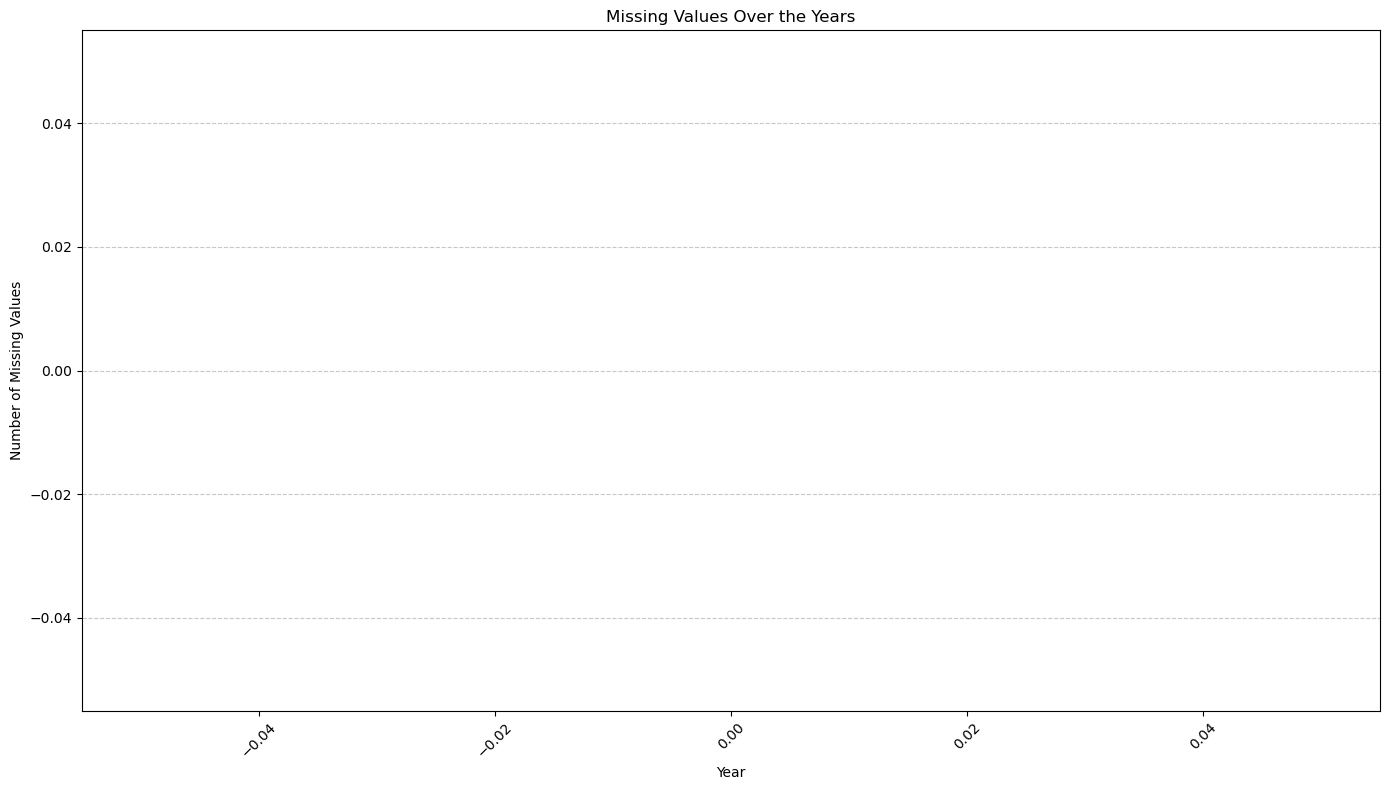

In [164]:
visualize_missing_values(forest_area)

Đối với chỉ số *'Forest area'* có thể thấy không xuất hiện giá trị bị khuyết qua các năm, nhưnng thiếu dữ liệu của các quốc gia Hong Kong, Macao và Taiwan.

In [165]:
shared_area = asian_fac[asian_fac['Indicator']=='Share of forest area']
shared_area

Country ISO3             Indicator     Unit      F1992  \
3             Afghanistan  AFG  Share of forest area  Percent   1.852782   
9                 Armenia  ARM  Share of forest area  Percent  11.742606   
13             Azerbaijan  AZE  Share of forest area  Percent  11.454823   
17                Bahrain  BHR  Share of forest area  Percent   0.352113   
23             Bangladesh  BGD  Share of forest area  Percent  14.752474   
29                 Bhutan  BTN  Share of forest area  Percent  54.075637   
35      Brunei Darussalam  BRN  Share of forest area  Percent  77.760911   
41               Cambodia  KHM  Share of forest area  Percent  62.089463   
47                  China  CHN  Share of forest area  Percent  17.161088   
53                 Cyprus  CYP  Share of forest area  Percent  17.663420   
59                Georgia  GEO  Share of forest area  Percent  39.631026   
65                  India  IND  Share of forest area  Percent  21.750578   
71              Indonesia  IDN  Share of forest area  Percent  63.531633   
77                   Iran  IRN  Share of forest area  Percent   5.603023   
83                   Iraq  IRQ  Share of forest area  Percent   1.844662   
89                 Israel  ISR  Share of forest area  Percent   6.293900   
95                  Japan  JPN  Share of forest area  Percent  68.390565   
101                Jordan  JOR  Share of forest area  Percent   1.104941   
107            Kazakhstan  KAZ  Share of forest area  Percent   1.170938   
113           North Korea  PRK  Share of forest area  Percent  56.644481   
119           South Korea  KOR  Share of forest area  Percent  67.758656   
123                Kuwait  KWT  Share of forest area  Percent   0.209315   
129            Kyrgyzstan  KGZ  Share of forest area  Percent   5.971418   
135                  Laos  LAO  Share of forest area  Percent  76.947140   
141               Lebanon  LBN  Share of forest area  Percent  13.626197   
147              Malaysia  MYS  Share of forest area  Percent  62.191660   
153              Maldives  MDV  Share of forest area  Percent   2.733333   
159              Mongolia  MNG  Share of forest area  Percent   9.263294   
165               Myanmar  MMR  Share of forest area  Percent  58.677978   
171                 Nepal  NPL  Share of forest area  Percent  39.816448   
177                  Oman  OMN  Share of forest area  Percent   0.009693   
183              Pakistan  PAK  Share of forest area  Percent   6.345584   
189           Philippines  PHL  Share of forest area  Percent  25.773552   
193                 Qatar  QAT  Share of forest area  Percent   0.000000   
199          Saudi Arabia  SAU  Share of forest area  Percent   0.454484   
205             Singapore  SGP  Share of forest area  Percent  22.782388   
211             Sri Lanka  LKA  Share of forest area  Percent  36.892808   
217  Syrian Arab Republic  SYR  Share of forest area  Percent   2.089890   
221            Tajikistan  TJK  Share of forest area  Percent   2.917977   
227              Thailand  THA  Share of forest area  Percent  37.754507   
233           Timor-Leste  TLS  Share of forest area  Percent  64.579691   
239               Türkiye  TUR  Share of forest area  Percent  25.800000   
245          Turkmenistan  TKM  Share of forest area  Percent   8.782159   
251  United Arab Emirates  ARE  Share of forest area  Percent   3.631174   
257            Uzbekistan  UZB  Share of forest area  Percent   6.186621   
263              Viet Nam  VNM  Share of forest area  Percent  30.285379   
267    State of Palestine  PSE  Share of forest area  Percent   1.508306   
277                 Yemen  YEM  Share of forest area  Percent   1.039832   

         F1993      F1994      F1995      F1996      F1997  ...      F2013  \
3     1.852782   1.852782   1.852782   1.852782   1.852782  ...   1.852782   
9    11.735265  11.727924  11.720583  11.713242  11.705901  ...  11.588901   
13   11.505870  11.556917  11.607965  11.659012  11.710059 

In [166]:
shared_area['Country'].unique()

array(['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China', 'Cyprus',
       'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan',
       'Jordan', 'Kazakhstan', 'North Korea', 'South Korea', 'Kuwait',
       'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives',
       'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Philippines',
       'Qatar', 'Saudi Arabia', 'Singapore', 'Sri Lanka',
       'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Timor-Leste',
       'Türkiye', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan',
       'Viet Nam', 'State of Palestine', 'Yemen'], dtype=object)

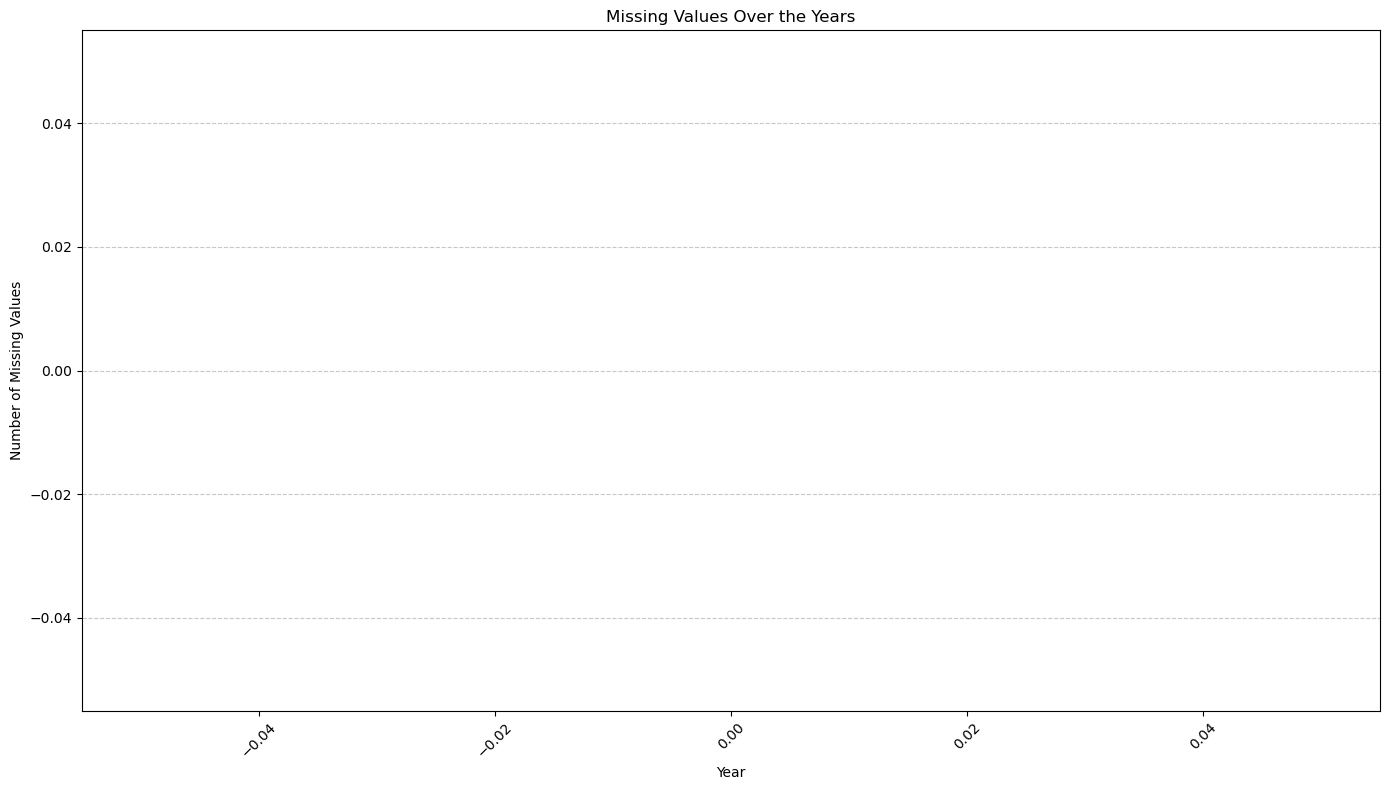

In [167]:
visualize_missing_values(shared_area)

Đối với chỉ số *'Share of forest area'* có thể thấy không xuất hiện giá trị bị khuyết qua các năm, nhưnng thiếu dữ liệu của các quốc gia Hong Kong, Macao và Taiwan.

In [168]:
carbon_in_forest = asian_fac[asian_fac['Indicator']=='Carbon stocks in forests']
carbon_in_forest

Country ISO3                 Indicator            Unit  \
4                 Armenia  ARM  Carbon stocks in forests  Million tonnes   
18             Bangladesh  BGD  Carbon stocks in forests  Million tonnes   
24                 Bhutan  BTN  Carbon stocks in forests  Million tonnes   
30      Brunei Darussalam  BRN  Carbon stocks in forests  Million tonnes   
36               Cambodia  KHM  Carbon stocks in forests  Million tonnes   
42                  China  CHN  Carbon stocks in forests  Million tonnes   
48                 Cyprus  CYP  Carbon stocks in forests  Million tonnes   
54                Georgia  GEO  Carbon stocks in forests  Million tonnes   
60                  India  IND  Carbon stocks in forests  Million tonnes   
66              Indonesia  IDN  Carbon stocks in forests  Million tonnes   
72                   Iran  IRN  Carbon stocks in forests  Million tonnes   
78                   Iraq  IRQ  Carbon stocks in forests  Million tonnes   
84                 Israel  ISR  Carbon stocks in forests  Million tonnes   
90                  Japan  JPN  Carbon stocks in forests  Million tonnes   
96                 Jordan  JOR  Carbon stocks in forests  Million tonnes   
102            Kazakhstan  KAZ  Carbon stocks in forests  Million tonnes   
108           North Korea  PRK  Carbon stocks in forests  Million tonnes   
114           South Korea  KOR  Carbon stocks in forests  Million tonnes   
124            Kyrgyzstan  KGZ  Carbon stocks in forests  Million tonnes   
130                  Laos  LAO  Carbon stocks in forests  Million tonnes   
136               Lebanon  LBN  Carbon stocks in forests  Million tonnes   
142              Malaysia  MYS  Carbon stocks in forests  Million tonnes   
148              Maldives  MDV  Carbon stocks in forests  Million tonnes   
154              Mongolia  MNG  Carbon stocks in forests  Million tonnes   
160               Myanmar  MMR  Carbon stocks in forests  Million tonnes   
166                 Nepal  NPL  Carbon stocks in forests  Million tonnes   
172                  Oman  OMN  Carbon stocks in forests  Million tonnes   
178              Pakistan  PAK  Carbon stocks in forests  Million tonnes   
184           Philippines  PHL  Carbon stocks in forests  Million tonnes   
190                 Qatar  QAT  Carbon stocks in forests  Million tonnes   
194          Saudi Arabia  SAU  Carbon stocks in forests  Million tonnes   
200             Singapore  SGP  Carbon stocks in forests  Million tonnes   
206             Sri Lanka  LKA  Carbon stocks in forests  Million tonnes   
212  Syrian Arab Republic  SYR  Carbon stocks in forests  Million tonnes   
222              Thailand  THA  Carbon stocks in forests  Million tonnes   
228           Timor-Leste  TLS  Carbon stocks in forests  Million tonnes   
234               Türkiye  TUR  Carbon stocks in forests  Million tonnes   
240          Turkmenistan  TKM  Carbon stocks in forests  Million tonnes   
246  United Arab Emirates  ARE  Carbon stocks in forests  Million tonnes   
252            Uzbekistan  UZB  Carbon stocks in forests  Million tonnes   
258              Viet Nam  VNM  Carbon stocks in forests  Million tonnes   
268                 World  WLD  Carbon stocks in forests  Million tonnes   
272                 Yemen  YEM  Carbon stocks in forests  Million tonnes   

           F1992        F1993        F1994        F1995        F1996  \
4        15.9489      15.9133      15.8777      15.8421      15.8065   
18       83.5919      83.5919      83.5919      83.5919      83.5919   
24      458.7504     460.5530     462.3557     464.1583     465.9609   
30       58.9907      58.7604      58.5301      58.2998      58.0694   
36      556.8792     555.7421     554.6051     553.4680     552.3309   
42     5188.5163    5284.2391    5379.9619    5475.6846    5571.4074   
48        2.7107       2.7297       2.7487       2.7676       2.7866   
54      162.8544     167.8364     172.8185     177.8006     182.7826   
60     2342.6833    2404.

In [169]:
carbon_in_forest['Country'].unique()

array(['Armenia', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia',
       'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'North Korea',
       'South Korea', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia',
       'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan',
       'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'Sri Lanka',
       'Syrian Arab Republic', 'Thailand', 'Timor-Leste', 'Türkiye',
       'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Viet Nam',
       'World', 'Yemen'], dtype=object)

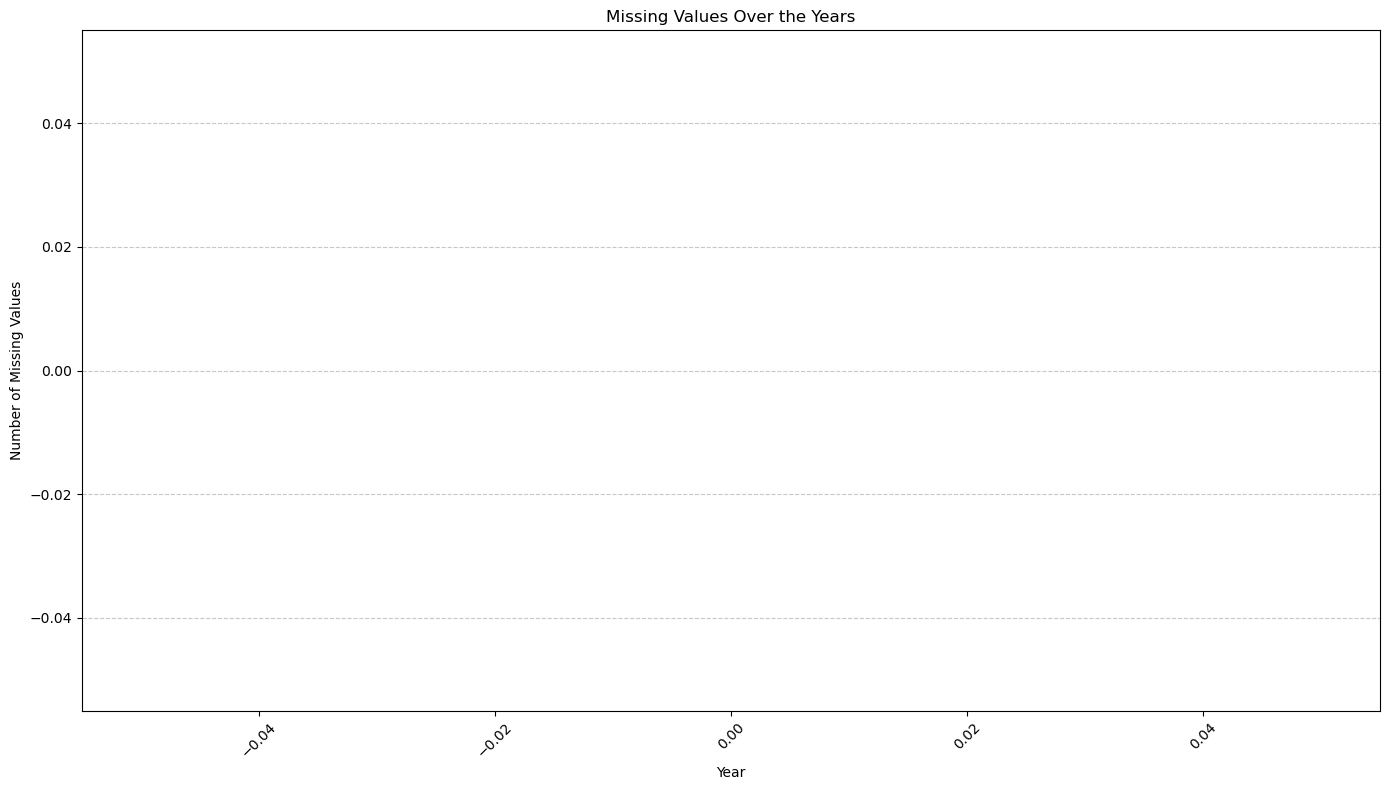

In [170]:
visualize_missing_values(carbon_in_forest)

Đối với chỉ số *'Carbon stocks in forests'* có thể thấy không xuất hiện giá trị bị khuyết qua các năm, nhưnng thiếu dữ liệu của 9 quốc gia Afghanistan, Azerbaijan, Bahrain, Kuwait, Hong Kong, Macao, Taiwan, Tajikistan và State of Palestine

## Lọc và tạo bộ dữ liệu cuối cùng

In [171]:
def preprocess_finaldata(df, output_path):
    '''
    Sau khi xem xét các phân tích và giá trị của dữ liệu. Nhóm lựa chọn giữ lại dữ liệu trong khoảng 2018-2022 làm dữ liệu phân tích chính.
    Trong đó các thuộc tính ['Country', 'ISO3', 'Indicator','Unit' được giữ lại cho bộ dữ liệu cuối cùng này.
    '''

    df = df[['Country', 'ISO3', 'Indicator', 'Unit', '2018', '2019', '2020', '2021', '2022']]
    
    df.to_csv(output_path, index=False)

    # Return the preprocessed DataFrame
    return df

In [172]:
# lưu lại các bộ dữ liệu đã xử lý cơ bản

path = '../data/preprecessed_data/asian_ast.csv'
preprocess_finaldata(asian_ast, path)

path = '../data/preprecessed_data/asian_fac.csv'
asian_fac.rename(columns=lambda col: col[1:] if col.startswith('F') else col, inplace=True)
preprocess_finaldata(asian_fac, path)

path = '../data/preprecessed_data/asian_cdf.csv'
preprocess_finaldata(asian_cdf, path)

path = '../data/preprecessed_data/msl.csv'
mean_sea_level = mean_sea_level[['Country', 'ISO3', 'Indicator', 'Unit', 2018, 2019, 2020, 2021, 2022]]
mean_sea_level.to_csv(path, index=False)

path = '../data/preprecessed_data/co2.csv'
co2_world = co2_world[['Country', 'ISO3', 'Indicator', 'Unit', 2018, 2019, 2020, 2021, 2022]]
co2_world.to_csv(path, index=False)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11652\2091257411.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asian_fac.rename(columns=lambda col: col[1:] if col.startswith('F') else col, inplace=True)


In [173]:
asian_ast = pd.read_csv('../data/preprecessed_data/asian_ast.csv')
asian_cdf = pd.read_csv('../data/preprecessed_data/asian_cdf.csv')
co2 = pd.read_csv('../data/preprecessed_data/co2.csv')
asian_fac = pd.read_csv('../data/preprecessed_data/asian_fac.csv')
msl = pd.read_csv('../data/preprecessed_data/msl.csv')

In [174]:
# Nối các DataFrame lại với nhau
df_final = pd.concat([asian_ast, asian_cdf, co2, asian_fac, msl], axis=0, ignore_index=True)
df_final

Country ISO3                                          Indicator  \
0    Afghanistan  AFG  Temperature change with respect to a baseline ...   
1        Armenia  ARM  Temperature change with respect to a baseline ...   
2     Azerbaijan  AZE  Temperature change with respect to a baseline ...   
3        Bahrain  BHR  Temperature change with respect to a baseline ...   
4     Bangladesh  BGD  Temperature change with respect to a baseline ...   
..           ...  ...                                                ...   
459        World  WLD                Change in mean sea level: Sea level   
460        World  WLD                Change in mean sea level: Sea level   
461        World  WLD                Change in mean sea level: Sea level   
462        World  WLD                Change in mean sea level: Sea level   
463        World  WLD                Change in mean sea level: Sea level   

               Unit       2018       2019       2020       2021        2022  
0    Degree Celsius   1.624000   0.991000   0.587000   1.475000    2.154000  
1    Degree Celsius   2.739000   1.864000   1.954000   2.183000    1.845000  
2    Degree Celsius   2.131000   1.878000   1.889000   1.958000    2.029000  
3    Degree Celsius   2.280000   2.127000   1.989000   2.421000    1.971000  
4    Degree Celsius   0.911000   1.151000   0.934000   1.326000    1.240000  
..              ...        ...        ...        ...        ...         ...  
459     Millimeters  50.945676  57.397027  79.274054  91.480135  121.407162  
460     Millimeters  56.553514  62.407568  62.722432  67.678514   72.066351  
461     Millimeters  57.667838  65.216486  67.589189  72.304730   74.039865  
462     Millimeters  57.700270  64.094865  66.817027  71.507568   73.794054  
463     Millimeters  49.320541  69.101622  79.796486  81.753919   80.917945  

[464 rows x 9 columns]

In [175]:
df_final['Indicator'].value_counts()

Indicator
Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980    52
TOTAL                                                                                               49
Forest area                                                                                         49
Share of forest area                                                                                48
Flood                                                                                               46
Carbon stocks in forests                                                                            43
Storm                                                                                               42
Drought                                                                                             32
Landslide                                                                                           28
Change in mean sea level: Sea level                            

In [176]:
df_final.to_csv('../data/preprecessed_data/final_data.csv', index=False)